I've hardcoded the dataset I used for the lecture for simplicity.

The US Treasury (UST) 1mo yields are annualized so they need to be divided by 12 to be monthly.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

df_with_ust = pd.DataFrame( [
    [ '2016-01-31',  -0.055502,  -0.053152,   0.001400 ],
    [ '2016-02-29',  -0.007350,  -0.002108,   0.002200 ],
    [ '2016-03-31',   0.051720,   0.068487,   0.002300 ],
    [ '2016-04-30',   0.006966,   0.004941,   0.001800 ],
    [ '2016-05-31',   0.027892,   0.018293,   0.001600 ],
    [ '2016-06-30',  -0.005134,   0.002585,   0.002700 ],
    [ '2016-07-31',   0.034287,   0.037951,   0.002000 ],
    [ '2016-08-31',   0.013054,   0.001513,   0.001900 ],
    [ '2016-09-30',   0.002538,   0.001082,   0.002600 ],
    [ '2016-10-31',  -0.031581,  -0.018951,   0.002000 ],
    [ '2016-11-30',   0.039977,   0.036114,   0.002000 ],
    [ '2016-12-31',   0.019372,   0.018659,   0.003800 ],
    [ '2017-01-31',   0.018434,   0.020714,   0.004400 ],
    [ '2017-02-28',   0.046731,   0.039318,   0.005000 ],
    [ '2017-03-31',   0.004910,   0.001411,   0.004000 ],
    [ '2017-04-30',   0.010674,   0.010810,   0.007400 ],
    [ '2017-05-31',   0.021175,   0.013638,   0.006800 ],
    [ '2017-06-30',   0.004648,   0.006265,   0.008600 ],
    [ '2017-07-31',   0.014318,   0.020373,   0.008400 ],
    [ '2017-08-31',   0.001012,   0.003279,   0.010000 ],
    [ '2017-09-30',   0.027527,   0.020393,   0.009500 ],
    [ '2017-10-31',   0.026831,   0.022899,   0.009600 ],
    [ '2017-11-30',   0.028212,   0.030441,   0.009900 ],
    [ '2017-12-31',   0.010278,   0.010840,   0.011400 ],
    [ '2018-01-31',   0.056213,   0.057393,   0.012800 ],
    [ '2018-02-28',  -0.037388,  -0.036695,   0.014300 ],
    [ '2018-03-31',  -0.022998,  -0.024401,   0.015000 ],
    [ '2018-04-30',   0.004559,   0.004016,   0.016300 ],
    [ '2018-05-31',   0.026579,   0.024384,   0.016500 ],
    [ '2018-06-30',   0.007567,   0.006791,   0.017600 ],
    [ '2018-07-31',   0.034805,   0.035899,   0.017700 ],
    [ '2018-08-31',   0.030711,   0.033114,   0.019400 ],
    [ '2018-09-30',   0.011475,   0.004573,   0.019500 ],
    [ '2018-10-31',  -0.071601,  -0.069426,   0.021200 ],
    [ '2018-11-30',   0.023625,   0.019483,   0.022000 ],
    [ '2018-12-31',  -0.090242,  -0.090079,   0.023100 ],
    [ '2019-01-31',   0.086169,   0.082238,   0.024400 ],
    [ '2019-02-28',   0.031177,   0.033477,   0.024200 ],
    [ '2019-03-31',   0.020574,   0.018489,   0.024400 ],
    [ '2019-04-30',   0.054576,   0.040099,   0.024300 ],
    [ '2019-05-31',  -0.074038,  -0.063225,   0.024300 ],
    [ '2019-06-30',   0.062860,   0.070236,   0.023500 ],
    [ '2019-07-31',   0.014356,   0.015449,   0.021800 ],
    [ '2019-08-31',  -0.014973,  -0.017391,   0.020100 ],
    [ '2019-09-30',   0.016001,   0.017788,   0.021000 ],
    [ '2019-10-31',   0.019543,   0.021770,   0.019100 ],
    [ '2019-11-30',   0.037112,   0.037594,   0.015900 ],
    [ '2019-12-31',   0.035761,   0.029319,   0.016200 ],
    [ '2020-01-31',  -0.001088,   0.001958,   0.014800 ],
    [ '2020-02-29',  -0.080706,  -0.081545,   0.015600 ],
    [ '2020-03-31',  -0.129634,  -0.126836,   0.014500 ],
    [ '2020-04-30',   0.135265,   0.131539,   0.000500 ],
    [ '2020-05-31',   0.050839,   0.052017,   0.001000 ],
    [ '2020-06-30',   0.055480,   0.022819,   0.001300 ],
    [ '2020-07-31',   0.052178,   0.059362,   0.001300 ],
    [ '2020-08-31',   0.072216,   0.075081,   0.000900 ],
    [ '2020-09-30',  -0.032087,  -0.037306,   0.000800 ],
    [ '2020-10-31',  -0.023123,  -0.026020,   0.000800 ],
    [ '2020-11-30',   0.111231,   0.115696,   0.000800 ],
    [ '2020-12-31',   0.055049,   0.041241,   0.000800 ],
    [ '2021-01-31',  -0.011823,  -0.009276,   0.000800 ],
    [ '2021-02-28',   0.043084,   0.026116,   0.000700 ],
    [ '2021-03-31',   0.040193,   0.037620,   0.000400 ],
    [ '2021-04-30',   0.056375,   0.054425,   0.000100 ],
    [ '2021-05-31',   0.006581,   0.004808,   0.000100 ],
    [ '2021-06-30',   0.019849,   0.027842,   0.000100 ],
    [ '2021-07-31',   0.017966,   0.023646,   0.000500 ],
    [ '2021-08-31',   0.033259,   0.029511,   0.000500 ],
    [ '2021-09-30',  -0.040383,  -0.047216,   0.000300 ],
    [ '2021-10-31',   0.071991,   0.069749,   0.000700 ],
    [ '2021-11-30',  -0.008463,  -0.010069,   0.000600 ],
    [ '2021-12-31',   0.045349,   0.039522,   0.001100 ],
    [ '2022-01-31',  -0.055950,  -0.056619,   0.000600 ],
    [ '2022-02-28',  -0.027559,  -0.029297,   0.000300 ],
    [ '2022-03-31',   0.037227,   0.035158,   0.000600 ],
    [ '2022-04-30',  -0.079285,  -0.090656,   0.001700 ],
    [ '2022-05-31',  -0.004351,  -0.002190,   0.003700 ],
    [ '2022-06-30',  -0.086715,  -0.082775,   0.007300 ],
    [ '2022-07-31',   0.089498,   0.093273,   0.012800 ],
    [ '2022-08-31',  -0.037066,  -0.039171,   0.022200 ],
    [ '2022-09-30',  -0.091178,  -0.092743,   0.024000 ],
    [ '2022-10-31',   0.077949,   0.079384,   0.027900 ],
    [ '2022-11-30',   0.057439,   0.054407,   0.037300 ],
    [ '2022-12-31',  -0.048995,  -0.058797,   0.040700 ],
    [ '2023-01-31',   0.065304,   0.065796,   0.041200 ],
], columns = ['date', 'fund', 'benchmark', '1mo_ust'])
df_with_ust['1mo_ust'] = df_with_ust['1mo_ust'] / 12

Here we insert a top row with zero return for all assets - this way we can calculate the performance of each asset starting on 12/31/2015.

The indexed performance shows the value of $1 invested in the fund/benchmark at the end of the day on 12/31/2015 over time.

This is calculated as the cumulative product:

$\text{perf}_t=\prod_{i=1}^{t}1+r_i$

For example, if you invest $1 into a stock, and it goes up 5% one day, and -3% the next day, you are left with

$\$1 \times (1+0.05) \times (1-0.03) = \$1.0185$

Then we calculate the tracking error (fund performance relative to the benchmark) and excess return (fund performance relative to the risk-free rate)

In [2]:
empty_row = pd.DataFrame([{'date':dt.date(2015, 12, 31), 'fund':0, 'benchmark':0, '1mo_ust':0}])
clean_df = pd.concat([empty_row, df_with_ust])
clean_df['tracking_error'] = clean_df['fund'] - clean_df['benchmark']
clean_df['excess_return'] = clean_df['fund'] - clean_df['1mo_ust']
clean_df['indexed_fund'] = np.cumprod(clean_df['fund']+1)
clean_df['indexed_bench'] = np.cumprod(clean_df['benchmark']+1)
display(clean_df)

,date,fund,benchmark,1mo_ust,tracking_error,excess_return,indexed_fund,indexed_bench
0,2015-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
0,2016-01-31,-0.055502,-0.053152,0.000117,-0.002350,-0.055619,0.944498,0.946848
1,2016-02-29,-0.007350,-0.002108,0.000183,-0.005242,-0.007533,0.937556,0.944852
2,2016-03-31,0.051720,0.068487,0.000192,-0.016767,0.051528,0.986046,1.009562
3,2016-04-30,0.006966,0.004941,0.000150,0.002025,0.006816,0.992915,1.014550
...,...,...,...,...,...,...,...,...
80,2022-09-30,-0.091178,-0.092743,0.002000,0.001565,-0.093178,2.144082,1.981833
81,2022-10-31,0.077949,0.079384,0.002325,-0.001435,0.075624,2.311211,2.139158
82,2022-11-30,0.057439,0.054407,0.003108,0.003032,0.054331,2.443965,2.255544
83,2022-12-31,-0.048995,-0.058797,0.003392,0.009802,-0.052387,2.324223,2.122924


We can plot the relative performance of the two funds over time. Doing some basic pandas to rename the data and convert the date to a pandas datetime.

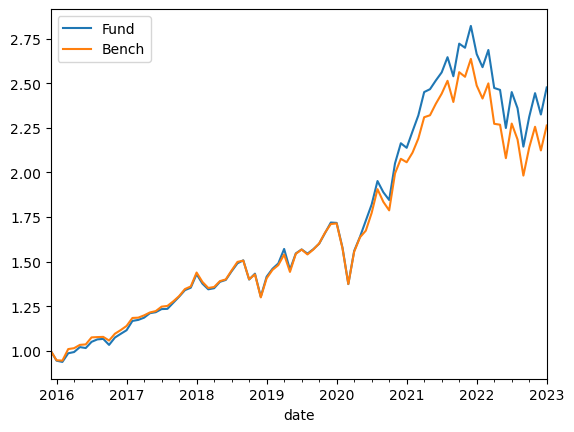

In [3]:
perf_df = clean_df[['date', 'indexed_fund', 'indexed_bench']].copy()\
            .rename(columns={'indexed_fund':'Fund', 'indexed_bench':'Bench'})
perf_df['date'] = pd.to_datetime(perf_df['date'])
perf_df.set_index('date', inplace=True)
perf_df.plot()
plt.show()

Now use simple regression of the fund against the benchmark returns using numpy. Plot the regression result against a scatterplot and calculate the R^2.

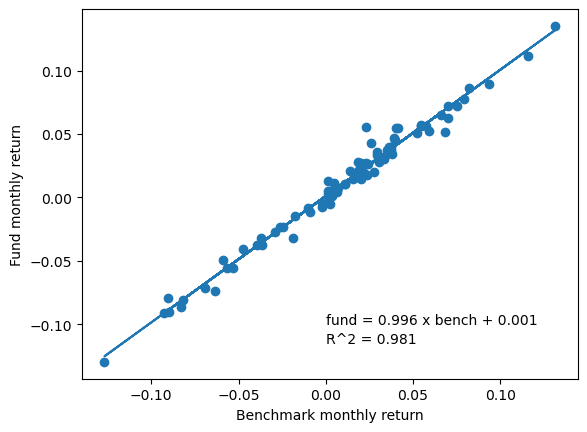

In [4]:
df = clean_df.iloc[1:] # need to skip the first row where all data is zero
plt.scatter(df['benchmark'], df['fund'])
((m,b), sum_sq_resid, _, _, _) = np.polyfit(df['benchmark'], df['fund'], 1, full=True)
plt.plot(df['benchmark'], df['benchmark']*m+b)
plt.text(0, -0.1, f"fund = {m:0.3f} x bench + {b:0.3f}")
sum_sq_resid = sum_sq_resid[0]
avg_fund_return = np.sum(df['fund'])/len(df['fund'])
sum_sq_total = np.sum((df['fund'] - avg_fund_return)**2)
r_sq = 1 - sum_sq_resid/sum_sq_total
plt.text(0, -0.115, f'R^2 = {r_sq:0.3f}')
plt.xlabel('Benchmark monthly return')
plt.ylabel('Fund monthly return')
plt.show()

Simple statistics can be done on the returns to calculate standardized fund performance figures.

The standard dev of returns has to be multiplied by $\sqrt{12}$ because we are using monthly returns and need to annualize them.

$$
\begin{align}
\text{vol}_\text{fund} &= \sigma_{r_\text{fund}} \sqrt{12}\\
\text{vol}_\text{bench} &= \sigma_{r_\text{bench}} \sqrt{12}\\
\text{vol}_\text{tracking error} &= \sigma_{r_\text{fund}-r_\text{bench}} \sqrt{12}\\
\beta_\text{fund} &= \frac{\text{cov}(r_\text{fund}, r_\text{bench})}{\sigma_{r_\text{bench}}^2}\\
\text{corr}_\text{fund, bench} &= \frac{\text{cov}(r_\text{fund}, r_\text{bench})}{\sigma_{r_\text{bench}}^2 \sigma_{r_\text{fund}}^2}\\
\text{Sharpe ratio}_\text{fund} &= \frac{\mathbb{E}(r_\text{fund}-r_\text{rfr})}{\sigma_{r_\text{fund}-r_\text{rfr}}}\\
\text{Information ratio}_\text{fund} &= \frac{\mathbb{E}(r_\text{fund}-r_\text{bench})}{\sigma_{r_\text{fund}-r_\text{bench}}}\\
\end{align}
$$

The CAGR is the compounded annual growth rate. You take the root of the number of years of the indexed performance, minus 1.

e.g. if the fund has been up 5% one year, then 10%, then down 7%, the indexed performance will be:
$$
\$1 \times 1.05 \times 1.10 \times 0.93 = 1.07415
$$

to get the CAGR:

$$
\text{CAGR} = \sqrt[3]{1.074155}-1 = 0.0241
$$

So you could have held an asset for three years that returns 2.41\% per year for three years and it would have the same total return as the fund:
$$
\$1 \times 1.0241 \times 1.0241 \times 1.0241 = 1.07415
$$

In [5]:
active_return = clean_df['tracking_error'].iloc[1:]
excess_return = clean_df['excess_return'].iloc[1:]
covar = np.cov(clean_df['fund'], clean_df['benchmark'])
vol_fund = np.sqrt(covar[0,0]*12)
vol_bench = np.sqrt(covar[1,1]*12)
tracking_error = np.sqrt(np.cov(active_return)*12)
beta = covar[0,1]/covar[1,1]
corr = covar[0,1]/np.sqrt(covar[0,0]*covar[1,1])
sharpe = np.mean(excess_return*12)/np.sqrt(np.cov(excess_return)*12)
info_ratio = np.mean(active_return*12)/np.sqrt(np.cov(active_return)*12)

firstrow = clean_df.iloc[0]
lastrow = clean_df.iloc[-1]
n_yr = len(clean_df)/12
fund_cagr = np.power(lastrow['indexed_fund']/firstrow['indexed_fund'],1/n_yr)-1
bench_cagr = np.power(lastrow['indexed_bench']/firstrow['indexed_bench'],1/n_yr)-1
active_cagr = fund_cagr - bench_cagr

print(f"Vol fund:       {vol_fund*100:-5.1f}%")
print(f"Vol bench:      {vol_bench*100:-5.1f}%")
print(f"Tracking error: {tracking_error*100:-5.1f}%")
print(f"Beta:           {beta:-6.2f}")
print(f"Corr:           {corr*100:-5.1f}%")
print(f"Sharpe:         {sharpe:-5.1f}")
print(f"Info Ratio:     {info_ratio:-5.1f}")
print(f"Fund CAGR:      {fund_cagr*100:-5.1f}%")
print(f"Bench CAGR:     {bench_cagr*100:-5.1f}%")
print(f"Active CAGR:    {active_cagr*100:-5.1f}%")

Vol fund:        16.6%
Vol bench:       16.5%
Tracking error:   2.3%
Beta:             1.00
Corr:            99.0%
Sharpe:           0.8
Info Ratio:       0.6
Fund CAGR:       13.5%
Bench CAGR:      12.1%
Active CAGR:      1.4%
